<a href="https://colab.research.google.com/github/Henriquerezer/FLAI-Cursos/blob/main/Rafinha_dos_dados_cursos/Redes_Neurais/Neural_network_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Bibliotecas básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/Henriquerezer/FLAI-Cursos/main/Rafinha_dos_dados_cursos/Redes_Neurais/Dados/base_nn.csv').set_index('ID')
data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_Absurd,Marital_Status_YOLO,Marital_Status_Alone,Response
ID,,,,,,,,,,,,,,,,,,,,,
4640,0.690848,0,1,0.557856,0.709976,1.415704,0.005696,-0.249902,2.280442,1.290817,...,0,0,0,0,0,0,0,0,0,0
5186,0.227408,0,1,0.351303,0.753236,-0.486375,-0.245365,-0.355516,-0.493409,-0.719357,...,0,1,1,0,0,0,0,0,0,0
538,-0.244032,1,0,1.005388,-0.818577,-0.437604,-0.639889,-0.408324,-0.445584,-0.230904,...,0,0,0,1,0,0,0,0,0,0
4764,-0.459846,1,1,0.110324,-0.778200,-0.364447,-0.527808,-0.249902,-0.134721,-0.606637,...,1,0,0,0,1,0,0,0,0,1
5138,-0.921648,0,1,0.661133,-0.853185,-0.632689,-0.698171,-0.637155,-0.612971,-0.775717,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,0.638123,0,1,-1.197846,0.510975,-0.535146,-0.617473,-0.461131,-0.541234,-0.456344,...,0,0,0,1,0,0,0,0,0,0
8104,0.030451,0,0,-0.578187,-0.212924,-0.657074,-0.707137,-0.689962,-0.660796,-0.381197,...,0,1,1,0,0,0,0,0,0,0
9370,0.507948,0,0,0.661133,0.712860,1.318161,0.476434,0.718229,0.295704,0.670857,...,0,1,1,0,0,0,0,0,0,0


In [5]:
X = data.drop('Response', axis = 1)
y = data['Response']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.3, random_state = 42)


In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Alguns parâmetros, você testa o GridSearchCV
params = {
    'hidden_layer_sizes': [(100,), (70,100), (100,70), (100,70,30) ],
    'learning_rate_init': np.logspace(-5,-1,10,base=10),
    'alpha': np.logspace(-7,-3,10,base=10),
}


# Outros você deixa fixo e meche "à mão", se necessário
mlp = GridSearchCV(
    MLPClassifier(
        activation='relu',
        solver='adam',
        batch_size=256,
        random_state=61658,
        early_stopping=True,
    ),
    params,
    cv=10,
    scoring='roc_auc',
    verbose=10,
    n_jobs=3,
)

mlp.fit(X_train, y_train) # 14 min

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid featu

GridSearchCV(cv=10,
             estimator=MLPClassifier(batch_size=256, early_stopping=True,
                                     random_state=61658),
             n_jobs=3,
             param_grid={'alpha': array([1.00000000e-07, 2.78255940e-07, 7.74263683e-07, 2.15443469e-06,
       5.99484250e-06, 1.66810054e-05, 4.64158883e-05, 1.29154967e-04,
       3.59381366e-04, 1.00000000e-03]),
                         'hidden_layer_sizes': [(100,), (70, 100), (100, 70),
                                                (100, 70, 30)],
                         'learning_rate_init': array([1.00000000e-05, 2.78255940e-05, 7.74263683e-05, 2.15443469e-04,
       5.99484250e-04, 1.66810054e-03, 4.64158883e-03, 1.29154967e-02,
       3.59381366e-02, 1.00000000e-01])},
             scoring='roc_auc', verbose=10)

In [12]:
mlp.best_params_

{'alpha': 5.994842503189409e-06,
 'hidden_layer_sizes': (100, 70, 30),
 'learning_rate_init': 0.004641588833612777}

In [13]:
from sklearn.metrics import roc_auc_score
print('Score ROC_AUC : ', roc_auc_score(y_test, mlp.predict_proba(X_test)[:,1]))

Score ROC_AUC :  0.8737289340823438


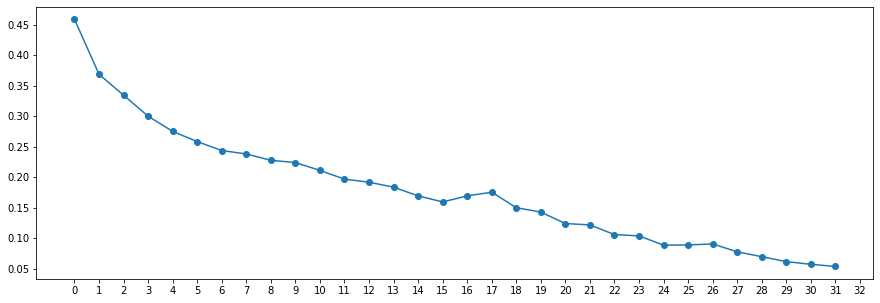

In [19]:
loss = mlp.best_estimator_.loss_curve_

plt.figure(figsize=(15,5))
plt.plot(loss, 'o-')
plt.xticks(np.arange(33));

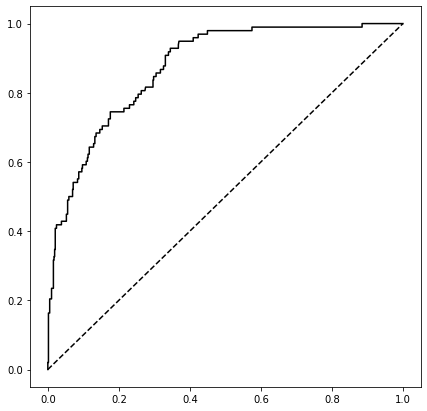

In [15]:
from sklearn.metrics import roc_curve

fpr, tpr, ths = roc_curve( y_test, mlp.predict_proba(X_test)[:,1] )

plt.figure(figsize=(7,7))
plt.plot(fpr,tpr,'k-')
plt.plot((0,1),(0,1),'k--')